In [2]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten, Input, LocallyConnected2D

In [3]:
!gdown --id 1vQSdhSoqYdLAMp8ctVB_SvTO-aCzh0Qa
!unzip crops

Downloading...
From: https://drive.google.com/uc?id=1vQSdhSoqYdLAMp8ctVB_SvTO-aCzh0Qa
To: /content/crops.zip
2.36MB [00:00, 37.4MB/s]
Archive:  crops.zip
   creating: crops/
   creating: crops/test/
   creating: crops/test/Angry/
  inflating: crops/test/Angry/0009.jpg  
  inflating: crops/test/Angry/0013.jpg  
  inflating: crops/test/Angry/0022.jpg  
  inflating: crops/test/Angry/0025.jpg  
  inflating: crops/test/Angry/0045.jpg  
  inflating: crops/test/Angry/0053.jpg  
  inflating: crops/test/Angry/0055.jpg  
  inflating: crops/test/Angry/0067.jpg  
  inflating: crops/test/Angry/0070.jpg  
  inflating: crops/test/Angry/0073.jpg  
   creating: crops/test/Disgust/
  inflating: crops/test/Disgust/0003.jpg  
  inflating: crops/test/Disgust/0006.jpg  
  inflating: crops/test/Disgust/0008.jpg  
  inflating: crops/test/Disgust/0014.jpg  
  inflating: crops/test/Disgust/0027.jpg  
  inflating: crops/test/Disgust/0029.jpg  
  inflating: crops/test/Disgust/0032.jpg  
  inflating: crops/test/Di

In [4]:
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   horizontal_flip=True,
                                   rotation_range=5,  
                                   width_shift_range=0.05,
                                   height_shift_range=0.05,)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        'crops/train',
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        'crops/test',
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical')

Found 240 images belonging to 6 classes.
Found 69 images belonging to 6 classes.


In [5]:
num_classes = 6

# **Model**

In [6]:
## Define Your Model HERE!
model = Sequential()

model.add(Input(shape=(128,128,3)))
model.add(Conv2D(filters=8, kernel_size=(3, 3), activation='elu'))
model.add(Conv2D(filters=8, kernel_size=(3, 3), activation='elu'))
model.add(MaxPool2D())
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='elu'))
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='elu'))
model.add(MaxPool2D())
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='elu'))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='elu'))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(units=512, activation='elu'))
model.add(Dense(units=num_classes, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 126, 126, 8)       224       
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 124, 124, 8)       584       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 62, 62, 8)         0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 60, 60, 16)        1168      
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 58, 58, 16)        2320      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 29, 29, 16)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 27, 27, 32)       

In [7]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

history = model.fit(train_generator,
          epochs=100,
          validation_data=validation_generator)

Epoch 1/100
8/8 [==============================] - 34s 190ms/step - loss: 2.7372 - acc: 0.1569 - val_loss: 1.9309 - val_acc: 0.1739
Epoch 2/100
8/8 [==============================] - 1s 128ms/step - loss: 1.7087 - acc: 0.3075 - val_loss: 1.5600 - val_acc: 0.5072
Epoch 3/100
8/8 [==============================] - 1s 128ms/step - loss: 1.5421 - acc: 0.4610 - val_loss: 1.5241 - val_acc: 0.4638
Epoch 4/100
8/8 [==============================] - 1s 128ms/step - loss: 1.5050 - acc: 0.5130 - val_loss: 1.2680 - val_acc: 0.4783
Epoch 5/100
8/8 [==============================] - 1s 128ms/step - loss: 1.3117 - acc: 0.5407 - val_loss: 1.0670 - val_acc: 0.6232
Epoch 6/100
8/8 [==============================] - 1s 129ms/step - loss: 1.0334 - acc: 0.7124 - val_loss: 0.8551 - val_acc: 0.7101
Epoch 7/100
8/8 [==============================] - 1s 134ms/step - loss: 0.8840 - acc: 0.6978 - val_loss: 0.6303 - val_acc: 0.7826
Epoch 8/100
8/8 [==============================] - 1s 137ms/step - loss: 0.6174 - 

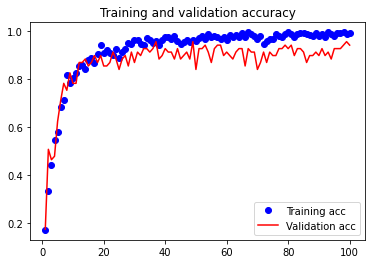

<Figure size 432x288 with 0 Axes>

In [8]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', color="blue", label='Training acc')
plt.plot(epochs, val_acc, 'b', color="red", label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.show()

# **with locally connected**

In [9]:
## Define Your Model HERE!
model = Sequential()

model.add(Input(shape=(128,128,3)))
model.add(Conv2D(filters=8, kernel_size=(3, 3), activation='elu'))
model.add(Conv2D(filters=8, kernel_size=(3, 3), activation='elu'))
model.add(MaxPool2D())
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='elu'))
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='elu'))
model.add(MaxPool2D())
model.add(LocallyConnected2D(filters=32, kernel_size=(3, 3), activation='elu'))
model.add(LocallyConnected2D(filters=32, kernel_size=(3, 3), activation='elu'))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(units=512, activation='elu'))
model.add(Dense(units=num_classes, activation='softmax'))

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 126, 126, 8)       224       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 124, 124, 8)       584       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 62, 62, 8)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 60, 60, 16)        1168      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 58, 58, 16)        2320      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 29, 29, 16)        0         
_________________________________________________________________
locally_connected2d (Locally (None, 27, 27, 32)       

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

history = model.fit(train_generator,
          epochs=100,
          validation_data=validation_generator)

Epoch 1/100
8/8 [==============================] - 35s 1s/step - loss: 1.7573 - acc: 0.2262 - val_loss: 1.7234 - val_acc: 0.3043
Epoch 2/100
8/8 [==============================] - 1s 157ms/step - loss: 1.6935 - acc: 0.3164 - val_loss: 1.5621 - val_acc: 0.5797
Epoch 3/100
8/8 [==============================] - 1s 156ms/step - loss: 1.5104 - acc: 0.4740 - val_loss: 0.9859 - val_acc: 0.6667
Epoch 4/100
8/8 [==============================] - 1s 166ms/step - loss: 1.1147 - acc: 0.6032 - val_loss: 0.7703 - val_acc: 0.6957
Epoch 5/100
8/8 [==============================] - 1s 152ms/step - loss: 0.8856 - acc: 0.6623 - val_loss: 0.6754 - val_acc: 0.7246
Epoch 6/100
8/8 [==============================] - 1s 151ms/step - loss: 0.7947 - acc: 0.7127 - val_loss: 0.6468 - val_acc: 0.7826
Epoch 7/100
8/8 [==============================] - 1s 152ms/step - loss: 0.8415 - acc: 0.7302 - val_loss: 0.5803 - val_acc: 0.7826
Epoch 8/100
8/8 [==============================] - 1s 156ms/step - loss: 0.6410 - acc

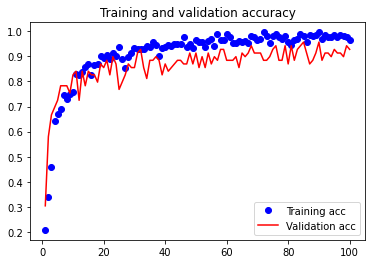

<Figure size 432x288 with 0 Axes>

In [12]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', color="blue", label='Training acc')
plt.plot(epochs, val_acc, 'b', color="red", label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.show()

# **with regularization L2, alpha = 1e-4**

In [13]:
## Define Your Model HERE!
model = Sequential()
regularizer=keras.regularizers.l2(1e-4)

model.add(Input(shape=(128,128,3)))
model.add(Conv2D(filters=8, kernel_size=(3, 3), activation='elu', kernel_regularizer=regularizer))
model.add(Conv2D(filters=8, kernel_size=(3, 3), activation='elu', kernel_regularizer=regularizer))
model.add(MaxPool2D())
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='elu', kernel_regularizer=regularizer))
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='elu', kernel_regularizer=regularizer))
model.add(MaxPool2D())
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='elu', kernel_regularizer=regularizer))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='elu', kernel_regularizer=regularizer))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(units=512, activation='elu', kernel_regularizer=regularizer))
model.add(Dense(units=num_classes, activation='softmax', kernel_regularizer=regularizer))

In [14]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 126, 126, 8)       224       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 124, 124, 8)       584       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 62, 62, 8)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 60, 60, 16)        1168      
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 58, 58, 16)        2320      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 29, 29, 16)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 27, 27, 32)       

In [15]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

history = model.fit(train_generator,
          epochs=100,
          validation_data=validation_generator)

Epoch 1/100
8/8 [==============================] - 2s 159ms/step - loss: 3.2963 - acc: 0.2680 - val_loss: 2.0461 - val_acc: 0.1884
Epoch 2/100
8/8 [==============================] - 1s 128ms/step - loss: 1.9548 - acc: 0.2655 - val_loss: 1.8654 - val_acc: 0.1594
Epoch 3/100
8/8 [==============================] - 1s 139ms/step - loss: 1.7958 - acc: 0.2801 - val_loss: 1.4559 - val_acc: 0.6377
Epoch 4/100
8/8 [==============================] - 1s 127ms/step - loss: 1.5407 - acc: 0.5050 - val_loss: 1.2949 - val_acc: 0.5652
Epoch 5/100
8/8 [==============================] - 1s 129ms/step - loss: 1.3401 - acc: 0.5354 - val_loss: 1.2618 - val_acc: 0.5797
Epoch 6/100
8/8 [==============================] - 1s 128ms/step - loss: 1.1967 - acc: 0.6256 - val_loss: 0.9171 - val_acc: 0.6377
Epoch 7/100
8/8 [==============================] - 1s 131ms/step - loss: 0.9483 - acc: 0.7201 - val_loss: 0.8032 - val_acc: 0.7536
Epoch 8/100
8/8 [==============================] - 1s 128ms/step - loss: 0.7518 - a

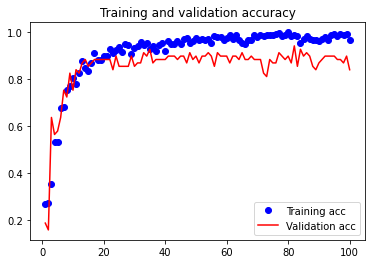

<Figure size 432x288 with 0 Axes>

In [17]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', color="blue", label='Training acc')
plt.plot(epochs, val_acc, 'b', color="red", label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.show()

# **with regularization L1, alpha = 1e-4**

In [28]:
## Define Your Model HERE!
model = Sequential()
regularizer=keras.regularizers.l1(1e-4)

model.add(Input(shape=(128,128,3)))
model.add(Conv2D(filters=8, kernel_size=(3, 3), activation='elu', kernel_regularizer=regularizer))
model.add(Conv2D(filters=8, kernel_size=(3, 3), activation='elu', kernel_regularizer=regularizer))
model.add(MaxPool2D())
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='elu', kernel_regularizer=regularizer))
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='elu', kernel_regularizer=regularizer))
model.add(MaxPool2D())
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='elu', kernel_regularizer=regularizer))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='elu', kernel_regularizer=regularizer))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(units=512, activation='elu', kernel_regularizer=regularizer))
model.add(Dense(units=num_classes, activation='softmax', kernel_regularizer=regularizer))

In [29]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 126, 126, 8)       224       
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 124, 124, 8)       584       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 62, 62, 8)         0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 60, 60, 16)        1168      
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 58, 58, 16)        2320      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 29, 29, 16)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 27, 27, 32)       

In [30]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

history = model.fit(train_generator,
          epochs=100,
          validation_data=validation_generator)

Epoch 1/100
8/8 [==============================] - 2s 167ms/step - loss: 7.4598 - acc: 0.1785 - val_loss: 5.9203 - val_acc: 0.1594
Epoch 2/100
8/8 [==============================] - 1s 130ms/step - loss: 5.7237 - acc: 0.2857 - val_loss: 5.5309 - val_acc: 0.4493
Epoch 3/100
8/8 [==============================] - 1s 130ms/step - loss: 5.3436 - acc: 0.5107 - val_loss: 5.0396 - val_acc: 0.5217
Epoch 4/100
8/8 [==============================] - 1s 128ms/step - loss: 4.9909 - acc: 0.5750 - val_loss: 4.6159 - val_acc: 0.6232
Epoch 5/100
8/8 [==============================] - 1s 129ms/step - loss: 4.6194 - acc: 0.6234 - val_loss: 4.2880 - val_acc: 0.6377
Epoch 6/100
8/8 [==============================] - 1s 137ms/step - loss: 4.2326 - acc: 0.6027 - val_loss: 3.8153 - val_acc: 0.7101
Epoch 7/100
8/8 [==============================] - 1s 131ms/step - loss: 3.8551 - acc: 0.7056 - val_loss: 3.6134 - val_acc: 0.6812
Epoch 8/100
8/8 [==============================] - 1s 128ms/step - loss: 3.4661 - a

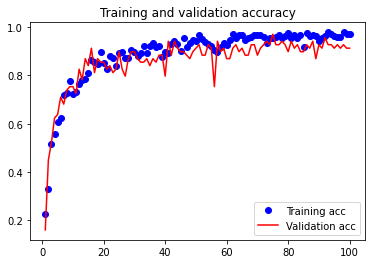

<Figure size 432x288 with 0 Axes>

In [31]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', color="blue", label='Training acc')
plt.plot(epochs, val_acc, 'b', color="red", label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.show()

# **more filters**

In [44]:
## Define Your Model HERE!
model = Sequential()
regularizer=keras.regularizers.l1(1e-4)

model.add(Input(shape=(128,128,3)))
model.add(Conv2D(filters=8, kernel_size=(3, 3), activation='elu', kernel_regularizer=regularizer))
model.add(Conv2D(filters=8, kernel_size=(3, 3), activation='elu', kernel_regularizer=regularizer))
model.add(Conv2D(filters=8, kernel_size=(3, 3), activation='elu', kernel_regularizer=regularizer))
model.add(MaxPool2D())
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='elu', kernel_regularizer=regularizer))
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='elu', kernel_regularizer=regularizer))
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='elu', kernel_regularizer=regularizer))
model.add(MaxPool2D())
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='elu', kernel_regularizer=regularizer))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='elu', kernel_regularizer=regularizer))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='elu', kernel_regularizer=regularizer))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(units=512, activation='elu', kernel_regularizer=regularizer))
model.add(Dense(units=num_classes, activation='softmax', kernel_regularizer=regularizer))

In [45]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 126, 126, 8)       224       
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 124, 124, 8)       584       
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 122, 122, 8)       584       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 61, 61, 8)         0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 59, 59, 16)        1168      
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 57, 57, 16)        2320      
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 55, 55, 16)       

In [46]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

history = model.fit(train_generator,
          epochs=100,
          validation_data=validation_generator)

Epoch 1/100
8/8 [==============================] - 2s 178ms/step - loss: 5.4676 - acc: 0.1936 - val_loss: 5.0408 - val_acc: 0.4493
Epoch 2/100
8/8 [==============================] - 1s 133ms/step - loss: 4.9439 - acc: 0.3716 - val_loss: 4.7819 - val_acc: 0.4348
Epoch 3/100
8/8 [==============================] - 1s 133ms/step - loss: 4.6119 - acc: 0.4247 - val_loss: 4.1668 - val_acc: 0.6232
Epoch 4/100
8/8 [==============================] - 1s 137ms/step - loss: 4.1539 - acc: 0.6387 - val_loss: 3.7898 - val_acc: 0.6667
Epoch 5/100
8/8 [==============================] - 1s 140ms/step - loss: 3.6989 - acc: 0.6700 - val_loss: 3.3805 - val_acc: 0.7101
Epoch 6/100
8/8 [==============================] - 1s 131ms/step - loss: 3.3737 - acc: 0.7338 - val_loss: 3.1593 - val_acc: 0.7681
Epoch 7/100
8/8 [==============================] - 1s 133ms/step - loss: 3.2642 - acc: 0.7539 - val_loss: 2.9249 - val_acc: 0.7971
Epoch 8/100
8/8 [==============================] - 1s 139ms/step - loss: 2.8597 - a

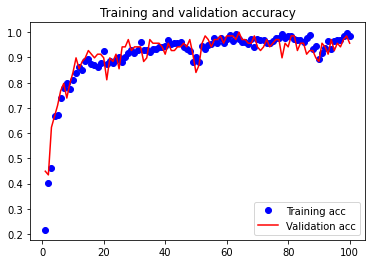

<Figure size 432x288 with 0 Axes>

In [47]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', color="blue", label='Training acc')
plt.plot(epochs, val_acc, 'b', color="red", label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.show()

# **more filters - one locally**

In [55]:
## Define Your Model HERE!
model = Sequential()
regularizer=keras.regularizers.l1(1e-4)

model.add(Input(shape=(128,128,3)))
model.add(Conv2D(filters=8, kernel_size=(3, 3), activation='elu', kernel_regularizer=regularizer))
model.add(Conv2D(filters=8, kernel_size=(3, 3), activation='elu', kernel_regularizer=regularizer))
model.add(Conv2D(filters=8, kernel_size=(3, 3), activation='elu', kernel_regularizer=regularizer))
model.add(MaxPool2D())
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='elu', kernel_regularizer=regularizer))
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='elu', kernel_regularizer=regularizer))
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='elu', kernel_regularizer=regularizer))
model.add(MaxPool2D())
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='elu', kernel_regularizer=regularizer))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='elu', kernel_regularizer=regularizer))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='elu', kernel_regularizer=regularizer))
model.add(MaxPool2D())
model.add(LocallyConnected2D(filters=64, kernel_size=(3, 3), activation='elu'))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(units=512, activation='elu', kernel_regularizer=regularizer))
model.add(Dense(units=num_classes, activation='softmax', kernel_regularizer=regularizer))

In [56]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_71 (Conv2D)           (None, 126, 126, 8)       224       
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 124, 124, 8)       584       
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 122, 122, 8)       584       
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 61, 61, 8)         0         
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 59, 59, 16)        1168      
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 57, 57, 16)        2320      
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 55, 55, 16)      

In [57]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

history = model.fit(train_generator,
          epochs=100,
          validation_data=validation_generator)

Epoch 1/100
8/8 [==============================] - 4s 223ms/step - loss: 3.6089 - acc: 0.2225 - val_loss: 3.5832 - val_acc: 0.1449
Epoch 2/100
8/8 [==============================] - 1s 133ms/step - loss: 3.4286 - acc: 0.2756 - val_loss: 3.3314 - val_acc: 0.4928
Epoch 3/100
8/8 [==============================] - 1s 132ms/step - loss: 3.2651 - acc: 0.3593 - val_loss: 3.1766 - val_acc: 0.3043
Epoch 4/100
8/8 [==============================] - 1s 132ms/step - loss: 3.0611 - acc: 0.3634 - val_loss: 2.6038 - val_acc: 0.5217
Epoch 5/100
8/8 [==============================] - 1s 132ms/step - loss: 2.6100 - acc: 0.5403 - val_loss: 2.2635 - val_acc: 0.5942
Epoch 6/100
8/8 [==============================] - 1s 130ms/step - loss: 2.1883 - acc: 0.6610 - val_loss: 2.0158 - val_acc: 0.6522
Epoch 7/100
8/8 [==============================] - 1s 133ms/step - loss: 2.1153 - acc: 0.6733 - val_loss: 1.8729 - val_acc: 0.7536
Epoch 8/100
8/8 [==============================] - 1s 130ms/step - loss: 2.0070 - a

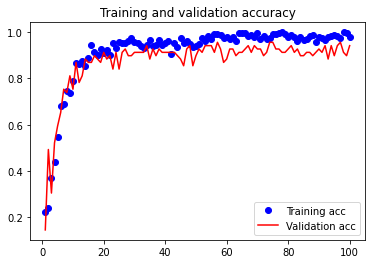

<Figure size 432x288 with 0 Axes>

In [58]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', color="blue", label='Training acc')
plt.plot(epochs, val_acc, 'b', color="red", label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.show()

# **more more filters**

In [48]:
## Define Your Model HERE!
model = Sequential()
regularizer=keras.regularizers.l1(1e-4)

model.add(Input(shape=(128,128,3)))
model.add(Conv2D(filters=8, kernel_size=(3, 3), activation='elu', kernel_regularizer=regularizer))
model.add(Conv2D(filters=8, kernel_size=(3, 3), activation='elu', kernel_regularizer=regularizer))
model.add(Conv2D(filters=8, kernel_size=(3, 3), activation='elu', kernel_regularizer=regularizer))
model.add(Conv2D(filters=8, kernel_size=(3, 3), activation='elu', kernel_regularizer=regularizer))
model.add(MaxPool2D())
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='elu', kernel_regularizer=regularizer))
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='elu', kernel_regularizer=regularizer))
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='elu', kernel_regularizer=regularizer))
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='elu', kernel_regularizer=regularizer))
model.add(MaxPool2D())
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='elu', kernel_regularizer=regularizer))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='elu', kernel_regularizer=regularizer))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='elu', kernel_regularizer=regularizer))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='elu', kernel_regularizer=regularizer))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(units=512, activation='elu', kernel_regularizer=regularizer))
model.add(Dense(units=num_classes, activation='softmax', kernel_regularizer=regularizer))

In [49]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_55 (Conv2D)           (None, 126, 126, 8)       224       
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 124, 124, 8)       584       
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 122, 122, 8)       584       
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 120, 120, 8)       584       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 60, 60, 8)         0         
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 58, 58, 16)        1168      
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 56, 56, 16)      

In [50]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

history = model.fit(train_generator,
          epochs=100,
          validation_data=validation_generator)

Epoch 1/100
8/8 [==============================] - 3s 197ms/step - loss: 4.9719 - acc: 0.1736 - val_loss: 4.7753 - val_acc: 0.4203
Epoch 2/100
8/8 [==============================] - 1s 129ms/step - loss: 4.5666 - acc: 0.4134 - val_loss: 4.2047 - val_acc: 0.5072
Epoch 3/100
8/8 [==============================] - 1s 133ms/step - loss: 4.1124 - acc: 0.6040 - val_loss: 3.4311 - val_acc: 0.6522
Epoch 4/100
8/8 [==============================] - 1s 135ms/step - loss: 3.5431 - acc: 0.6363 - val_loss: 3.1994 - val_acc: 0.7101
Epoch 5/100
8/8 [==============================] - 3s 454ms/step - loss: 3.1934 - acc: 0.6678 - val_loss: 3.0831 - val_acc: 0.7246
Epoch 6/100
8/8 [==============================] - 1s 135ms/step - loss: 3.2448 - acc: 0.6657 - val_loss: 2.8106 - val_acc: 0.7536
Epoch 7/100
8/8 [==============================] - 1s 135ms/step - loss: 2.8236 - acc: 0.7462 - val_loss: 2.7082 - val_acc: 0.6812
Epoch 8/100
8/8 [==============================] - 1s 139ms/step - loss: 2.7063 - a

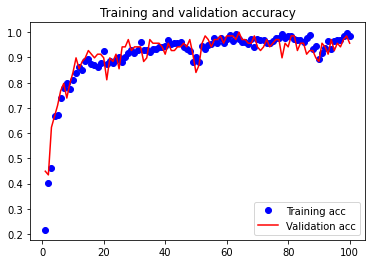

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', color="blue", label='Training acc')
plt.plot(epochs, val_acc, 'b', color="red", label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.show()

# **with regularization L1, alpha = 1e-3**

In [32]:
## Define Your Model HERE!
model = Sequential()
regularizer=keras.regularizers.l1(1e-3)

model.add(Input(shape=(128,128,3)))
model.add(Conv2D(filters=8, kernel_size=(3, 3), activation='elu', kernel_regularizer=regularizer))
model.add(Conv2D(filters=8, kernel_size=(3, 3), activation='elu', kernel_regularizer=regularizer))
model.add(MaxPool2D())
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='elu', kernel_regularizer=regularizer))
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='elu', kernel_regularizer=regularizer))
model.add(MaxPool2D())
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='elu', kernel_regularizer=regularizer))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='elu', kernel_regularizer=regularizer))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(units=512, activation='elu', kernel_regularizer=regularizer))
model.add(Dense(units=num_classes, activation='softmax', kernel_regularizer=regularizer))

In [33]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 126, 126, 8)       224       
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 124, 124, 8)       584       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 62, 62, 8)         0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 60, 60, 16)        1168      
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 58, 58, 16)        2320      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 29, 29, 16)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 27, 27, 32)       

In [34]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

history = model.fit(train_generator,
          epochs=100,
          validation_data=validation_generator)

Epoch 1/100
8/8 [==============================] - 2s 165ms/step - loss: 42.3678 - acc: 0.2388 - val_loss: 35.5921 - val_acc: 0.3043
Epoch 2/100
8/8 [==============================] - 1s 130ms/step - loss: 33.9886 - acc: 0.2830 - val_loss: 28.2933 - val_acc: 0.3478
Epoch 3/100
8/8 [==============================] - 1s 131ms/step - loss: 26.6134 - acc: 0.3309 - val_loss: 21.4448 - val_acc: 0.5942
Epoch 4/100
8/8 [==============================] - 1s 127ms/step - loss: 20.0830 - acc: 0.5684 - val_loss: 15.7332 - val_acc: 0.5507
Epoch 5/100
8/8 [==============================] - 1s 130ms/step - loss: 14.6116 - acc: 0.6388 - val_loss: 11.3928 - val_acc: 0.6377
Epoch 6/100
8/8 [==============================] - 1s 129ms/step - loss: 10.6733 - acc: 0.6691 - val_loss: 8.4369 - val_acc: 0.6377
Epoch 7/100
8/8 [==============================] - 1s 137ms/step - loss: 7.9545 - acc: 0.5891 - val_loss: 6.4437 - val_acc: 0.6232
Epoch 8/100
8/8 [==============================] - 1s 126ms/step - loss:

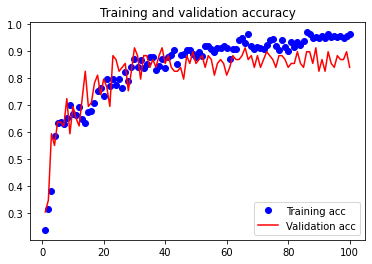

<Figure size 432x288 with 0 Axes>

In [35]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', color="blue", label='Training acc')
plt.plot(epochs, val_acc, 'b', color="red", label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.show()